In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade scikit-learn


 One of the tourism industry's fastest-growing industries is the hotel industry. Although the
hotel sector is expanding, there are certain advantages for hotels as well as some drawbacks.
One issue is the increasing number of hotel reservations that are canceled.
 The motivation for this project is to get a clearer picture of hotel booking demand. As a
consumer, there are many aspects to consider when choosing a hotel. Predicting cancellations
is useful not only for vacationers but also for hotels.






1.   Booking_ID: unique identifier of each booking
2.   no_of_adults: Number of adults
3.   no_of_children: Number of Children
4.   no_of_weekend_nights: Number of weekend nights (Saturday or Sunday)
the guest stayed or booked to stay at the hotel
5.   no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6.   type_of_meal_plan: Type of meal plan booked by the customer:
7.   required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
8.   room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9.   lead_time: Number of days between the date of booking and the arrival date
10.   arrival_year: Year of arrival date
11.   arrival_month: Month of arrival date
12.   arrival_date: Date of the month
13.   market_segment_type: Market segment designation.
14.   repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
15.   no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
16.   no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
17.   avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18.   no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19.   booking_status: Flag indicating if the booking was canceled or not.





























In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Hotel Reservations.csv')

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
df.shape

(36275, 19)

In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [10]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [11]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [12]:
df['booking_status'].replace(['Not_Canceled','Canceled'],[1,0],inplace=True)

#Analyzing Room Preference

In [13]:
room_preferences=df['room_type_reserved'].value_counts()

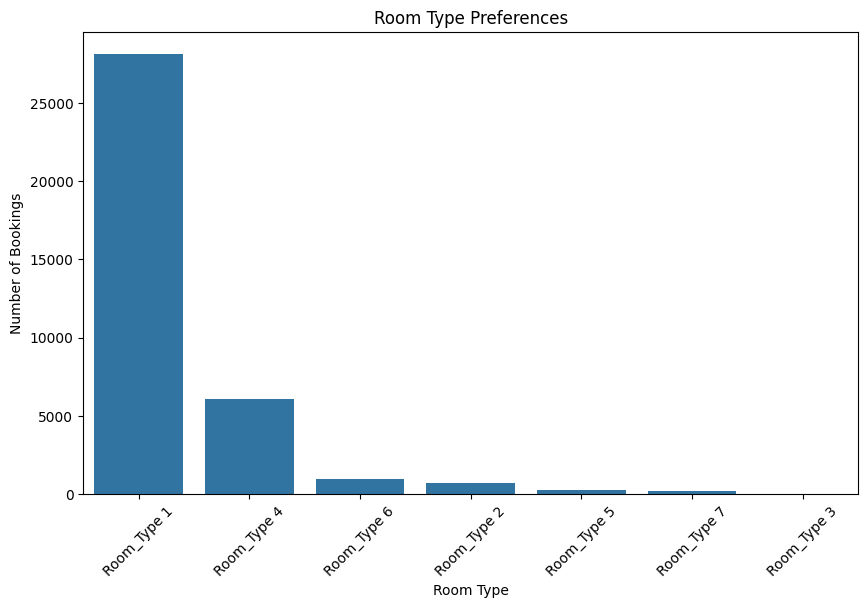

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=room_preferences.index, y=room_preferences.values)
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

There are clear preferences for certain room types, as indicated by the

varied number of bookings for each room type.
This information is crucial for managing room inventory and anticipating demand for specific room types.

#Meal Preference Analysis

In [15]:
meal_preference=df['type_of_meal_plan'].value_counts()

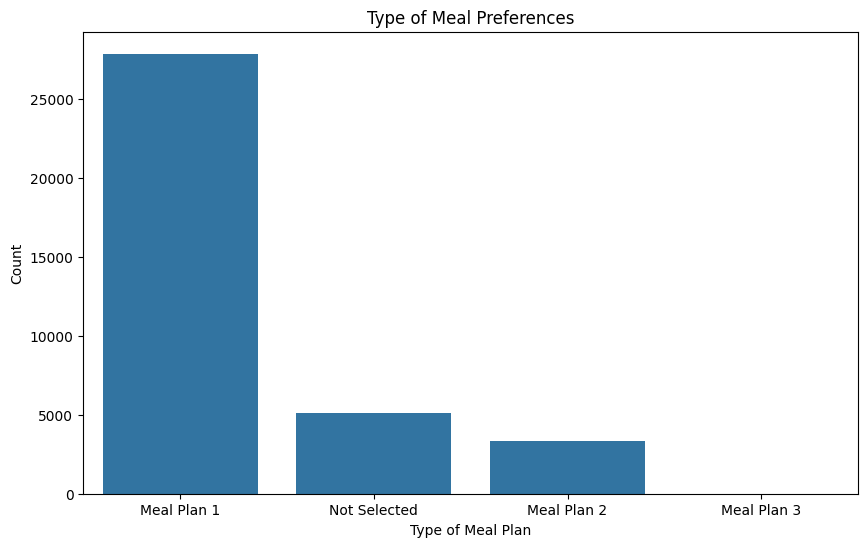

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=meal_preference.index,y=meal_preference.values)
plt.title('Type of Meal Preferences')
plt.ylabel('Count')
plt.xlabel('Type of Meal Plan')
plt.show()

The preference for different types of meal plans varies, indicating diverse guest needs and expectations regarding dining options.
This insight can guide meal planning, pricing strategies, and promotional offers.

#Booking Status Analysis

In [17]:
booking=df['booking_status'].value_counts()

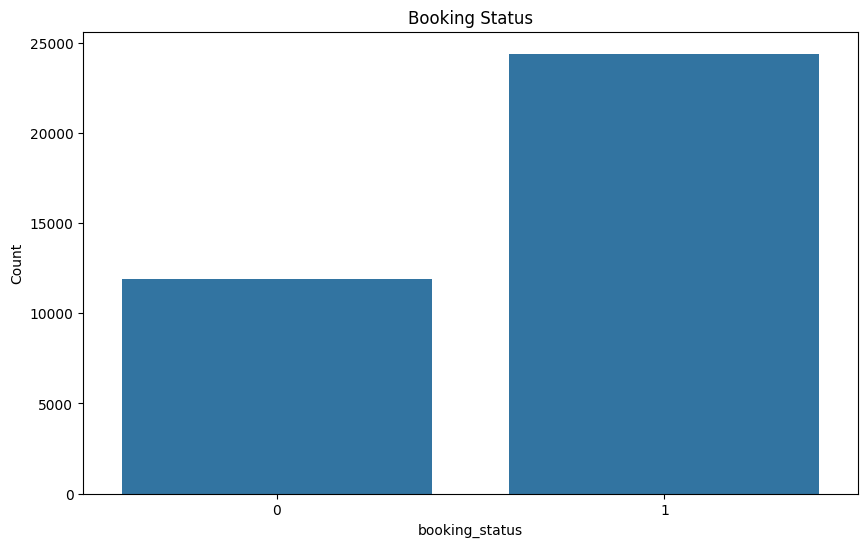

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=booking.index,y=booking.values)
plt.title('Booking Status')
plt.ylabel('Count')
plt.show()

#Analaysis of Repeated Quest

In [19]:
repeated_quest=df['repeated_guest'].value_counts()


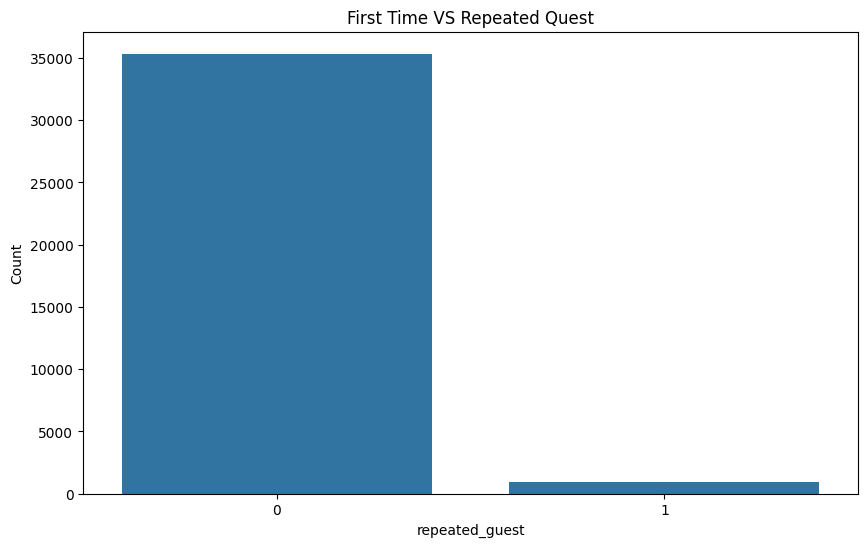

In [20]:
#repeated quest=1,not repeated quest=0
plt.figure(figsize=(10,6))
sns.barplot(x=repeated_quest.index,y=repeated_quest.values)
plt.title('First Time VS Repeated Quest')
plt.ylabel('Count')
plt.show()

The data shows a lower number of repeat guests compared to first-time guests. This suggests that there may be potential to increase guest retention and loyalty, which is critical for sustained business growth.

#Recommendations
*   Booking Trends: Identify peak seasons for targeted marketing and
 capacity planning. Consider off-peak promotions to balance occupancy rates.
*   Occupancy and Revenue: Implement dynamic pricing strategies to maximize revenue, especially during peak seasons.
*   Cancellation Patterns: Develop strategies to reduce cancellations, such as flexible booking policies or incentives for confirmed bookings.
*   Guest Loyalty: Focus on increasing repeat guest numbers through loyalty programs, personalized experiences, and targeted communication.















In [21]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [22]:
df.drop(columns='Booking_ID',inplace=True)

In [23]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [24]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [25]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [26]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
df['repeated_guest'].value_counts()

repeated_guest
0    35345
1      930
Name: count, dtype: int64

In [28]:
df['no_of_special_requests'].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

In [29]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [30]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [31]:
df['no_of_previous_bookings_not_canceled'].value_counts()

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [32]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [33]:
df.drop(columns=['no_of_previous_cancellations','no_of_previous_bookings_not_canceled','repeated_guest'],inplace=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False,drop='first')
onehot_res=pd.DataFrame(onehot.fit_transform(df[['type_of_meal_plan','room_type_reserved','market_segment_type']]),index=df.index)



In [35]:
df=pd.concat([df,onehot_res],axis='columns')

In [36]:
df.drop(columns=['type_of_meal_plan','room_type_reserved','market_segment_type','no_of_week_nights'],inplace=True)

In [37]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,...,3,4,5,6,7,8,9,10,11,12
0,2,0,1,0,224,2017,10,2,65.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,0,5,2018,11,6,106.68,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,0,1,2018,2,28,60.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,0,211,2018,5,20,100.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,0,48,2018,4,11,94.50,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,0,85,2018,8,3,167.80,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,2,0,1,0,228,2018,10,17,90.95,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,2,0,2,0,148,2018,7,1,98.39,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,2,0,0,0,63,2018,4,21,94.50,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df['avg_price_per_room'].value_counts()

avg_price_per_room
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: count, Length: 3930, dtype: int64

In [39]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [40]:
df.columns=df.columns.astype('str')

In [41]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE()

In [42]:
x=df.drop(columns='booking_status')
y=df['booking_status']

In [43]:
x,y=oversampler.fit_resample(x,y)

In [44]:
y.value_counts()

booking_status
1    24390
0    24390
Name: count, dtype: int64

In [45]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)

In [47]:
x_train_scaled

array([[-1.65357026, -0.24974337, -0.91522567, ...,  4.57013161,
        -0.63581936, -1.39329123],
       [ 0.31979139,  2.35404641,  1.43859952, ..., -0.22225627,
        -0.63581936,  0.72787247],
       [ 2.29315303, -0.24974337,  2.61551211, ..., -0.22225627,
        -0.63581936,  0.72787247],
       ...,
       [ 0.31979139, -0.24974337,  0.26168693, ..., -0.22225627,
        -0.63581936,  0.72787247],
       [ 0.31979139, -0.24974337, -0.91522567, ..., -0.22225627,
        -0.63581936,  0.72787247],
       [ 0.31979139, -0.24974337, -0.91522567, ..., -0.22225627,
        -0.63581936,  0.72787247]])

In [48]:
x_test_scaled=sc.transform(x_test)

In [49]:
x_test_scaled

array([[ 0.31979139, -0.24974337,  0.26168693, ..., -0.22225627,
        -0.63581936,  0.72787247],
       [ 0.31979139, -0.24974337,  0.26168693, ..., -0.22225627,
        -0.63581936,  0.72787247],
       [-1.65357026, -0.24974337,  1.43859952, ..., -0.22225627,
         1.5923783 , -1.39329123],
       ...,
       [-1.65357026, -0.24974337, -0.91522567, ..., -0.22225627,
         1.5923783 , -1.39329123],
       [ 0.31979139,  4.95783619, -0.91522567, ..., -0.22225627,
        -0.63581936,  0.72787247],
       [ 0.31979139, -0.24974337,  0.26168693, ..., -0.22225627,
        -0.63581936,  0.72787247]])

In [50]:
# param_dist = {
#     'n_estimators': [10, 50, 100, 200, 500, 1000],  # Number of trees in the forest
#     'max_features': ['auto', 'sqrt'],    # Number of features to consider at each split
#     'max_depth': [None, 10, 20, 30, 40, 50]}
# rf=RandomForestClassifier()
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
# random_search.fit(x_train_scaled, y_train)

In [51]:
# random_search.best_params_

In [52]:
# best_params={'n_estimators': 500, 'max_features': 'auto', 'max_depth': None}

In [53]:
from xgboost import XGBClassifier


In [54]:
model_knn=KNeighborsClassifier()
model_rc=RandomForestClassifier()
model_svm=SVC()
model_bayes=BernoulliNB()
model_xgb=XGBClassifier()


In [55]:
models=[model_knn,model_rc,model_svm,model_bayes]
for model in models:
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4884
           1       0.87      0.87      0.87      4872

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4884
           1       0.92      0.93      0.93      4872

    accuracy                           0.93      9756
   macro avg       0.93      0.93      0.93      9756
weighted avg       0.93      0.93      0.93      9756

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4884
           1       0.85      0.85      0.85      4872

    accuracy                           0.85      9756
   macro avg       0.85      0.85      0.85      9756
weighted avg       0.85      0.85      0.85      9756

              preci

In [56]:
dict1={'model':model_rc,'encoder':onehot}

In [57]:
import pickle
with open('hotel_prediction_final.pkl','wb') as file:
  pickle.dump(dict1,file)

In [58]:
# with open('hotel_prediction_final36.pkl','rb') as file1:
#   var1=pickle.load(file1)
# var1